In [5]:
# pip list --outdated


Package                   Version         Latest         Type
------------------------- --------------- -------------- -----
anyio                     4.3.0           4.6.2.post1    wheel
asgiref                   3.7.2           3.8.1          wheel
Babel                     2.14.0          2.16.0         wheel
blinker                   1.7.0           1.8.2          wheel
cffi                      1.16.0          1.17.1         wheel
charset-normalizer        3.3.2           3.4.0          wheel
comm                      0.2.1           0.2.2          wheel
debugpy                   1.8.1           1.8.7          wheel
Django                    5.0.3           5.1.2          wheel
djangorestframework       3.14.0          3.15.2         wheel
executing                 2.0.1           2.1.0          wheel
fastjsonschema            2.19.1          2.20.0         wheel
filelock                  3.13.1          3.16.1         wheel
Flask                     2.1.3           3.0.3         

In [1]:
import pandas as pd 
import numpy as np 
import os 

# Data visualization
import matplotlib.pyplot as plt
plt.style.use("bmh")
%matplotlib inline
import seaborn as sns


# Machine learning

from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.metrics import  confusion_matrix,f1_score,roc_auc_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

In [2]:
pwd

'C:\\Users\\Dhanesh\\Video game'

In [3]:
# Load data into a Pandas dataframe
df = pd.read_csv('video_game.csv')

In [4]:
df

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


In [8]:
df.shape

(16598, 11)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [10]:
df.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16598.000000,16327.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,8300.605254,2006.406443,0.264667,0.146652,0.077782,0.048063,0.537441
std,4791.853933,5.828981,0.816683,0.505351,0.309291,0.188588,1.555028
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4151.250000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8300.500000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12449.750000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.470000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


In [32]:
#missing value
df.isnull().sum()

Rank            0
Name            0
Platform        0
Year            0
Genre           0
Publisher       0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
dtype: int64

In [33]:
df=df.dropna()

In [34]:
df['NA_Sales'] = pd.to_numeric(df['NA_Sales'], errors='coerce')
df['EU_Sales'] = pd.to_numeric(df['EU_Sales'], errors='coerce')
df['JP_Sales'] = pd.to_numeric(df['JP_Sales'], errors='coerce')
df['Other_Sales'] = pd.to_numeric(df['Other_Sales'], errors='coerce')
df['Global_Sales'] = pd.to_numeric(df['Global_Sales'], errors='coerce')


In [35]:
df.isnull().sum()

Rank            0
Name            0
Platform        0
Year            0
Genre           0
Publisher       0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
dtype: int64

In [36]:
df.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16291.000000,16291.000000,16291.000000,16291.000000,16291.000000,16291.000000,16291.000000
mean,8290.190228,2006.405561,0.265647,0.147731,0.078833,0.048426,0.540910
std,4792.654450,5.832412,0.822432,0.509303,0.311879,0.190083,1.567345
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4132.500000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8292.000000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12439.500000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.480000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


In [37]:
#Exploratory data Analysis
#correlation 
df_numeric = df.select_dtypes(include=[np.number])
correlation_matrix = df_numeric.corr()
print(correlation_matrix)

                  Rank      Year  NA_Sales  EU_Sales  JP_Sales  Other_Sales  \
Rank          1.000000  0.178027 -0.400315 -0.379137 -0.269323    -0.332735   
Year          0.178027  1.000000 -0.091285  0.006108 -0.169387     0.041128   
NA_Sales     -0.400315 -0.091285  1.000000  0.768923  0.451283     0.634518   
EU_Sales     -0.379137  0.006108  0.768923  1.000000  0.436379     0.726256   
JP_Sales     -0.269323 -0.169387  0.451283  0.436379  1.000000     0.290559   
Other_Sales  -0.332735  0.041128  0.634518  0.726256  0.290559     1.000000   
Global_Sales -0.426975 -0.074647  0.941269  0.903264  0.612774     0.747964   

              Global_Sales  
Rank             -0.426975  
Year             -0.074647  
NA_Sales          0.941269  
EU_Sales          0.903264  
JP_Sales          0.612774  
Other_Sales       0.747964  
Global_Sales      1.000000  


In [38]:
print(df.columns)

Index(['Rank', 'Name', 'Platform', 'Year', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales'],
      dtype='object')


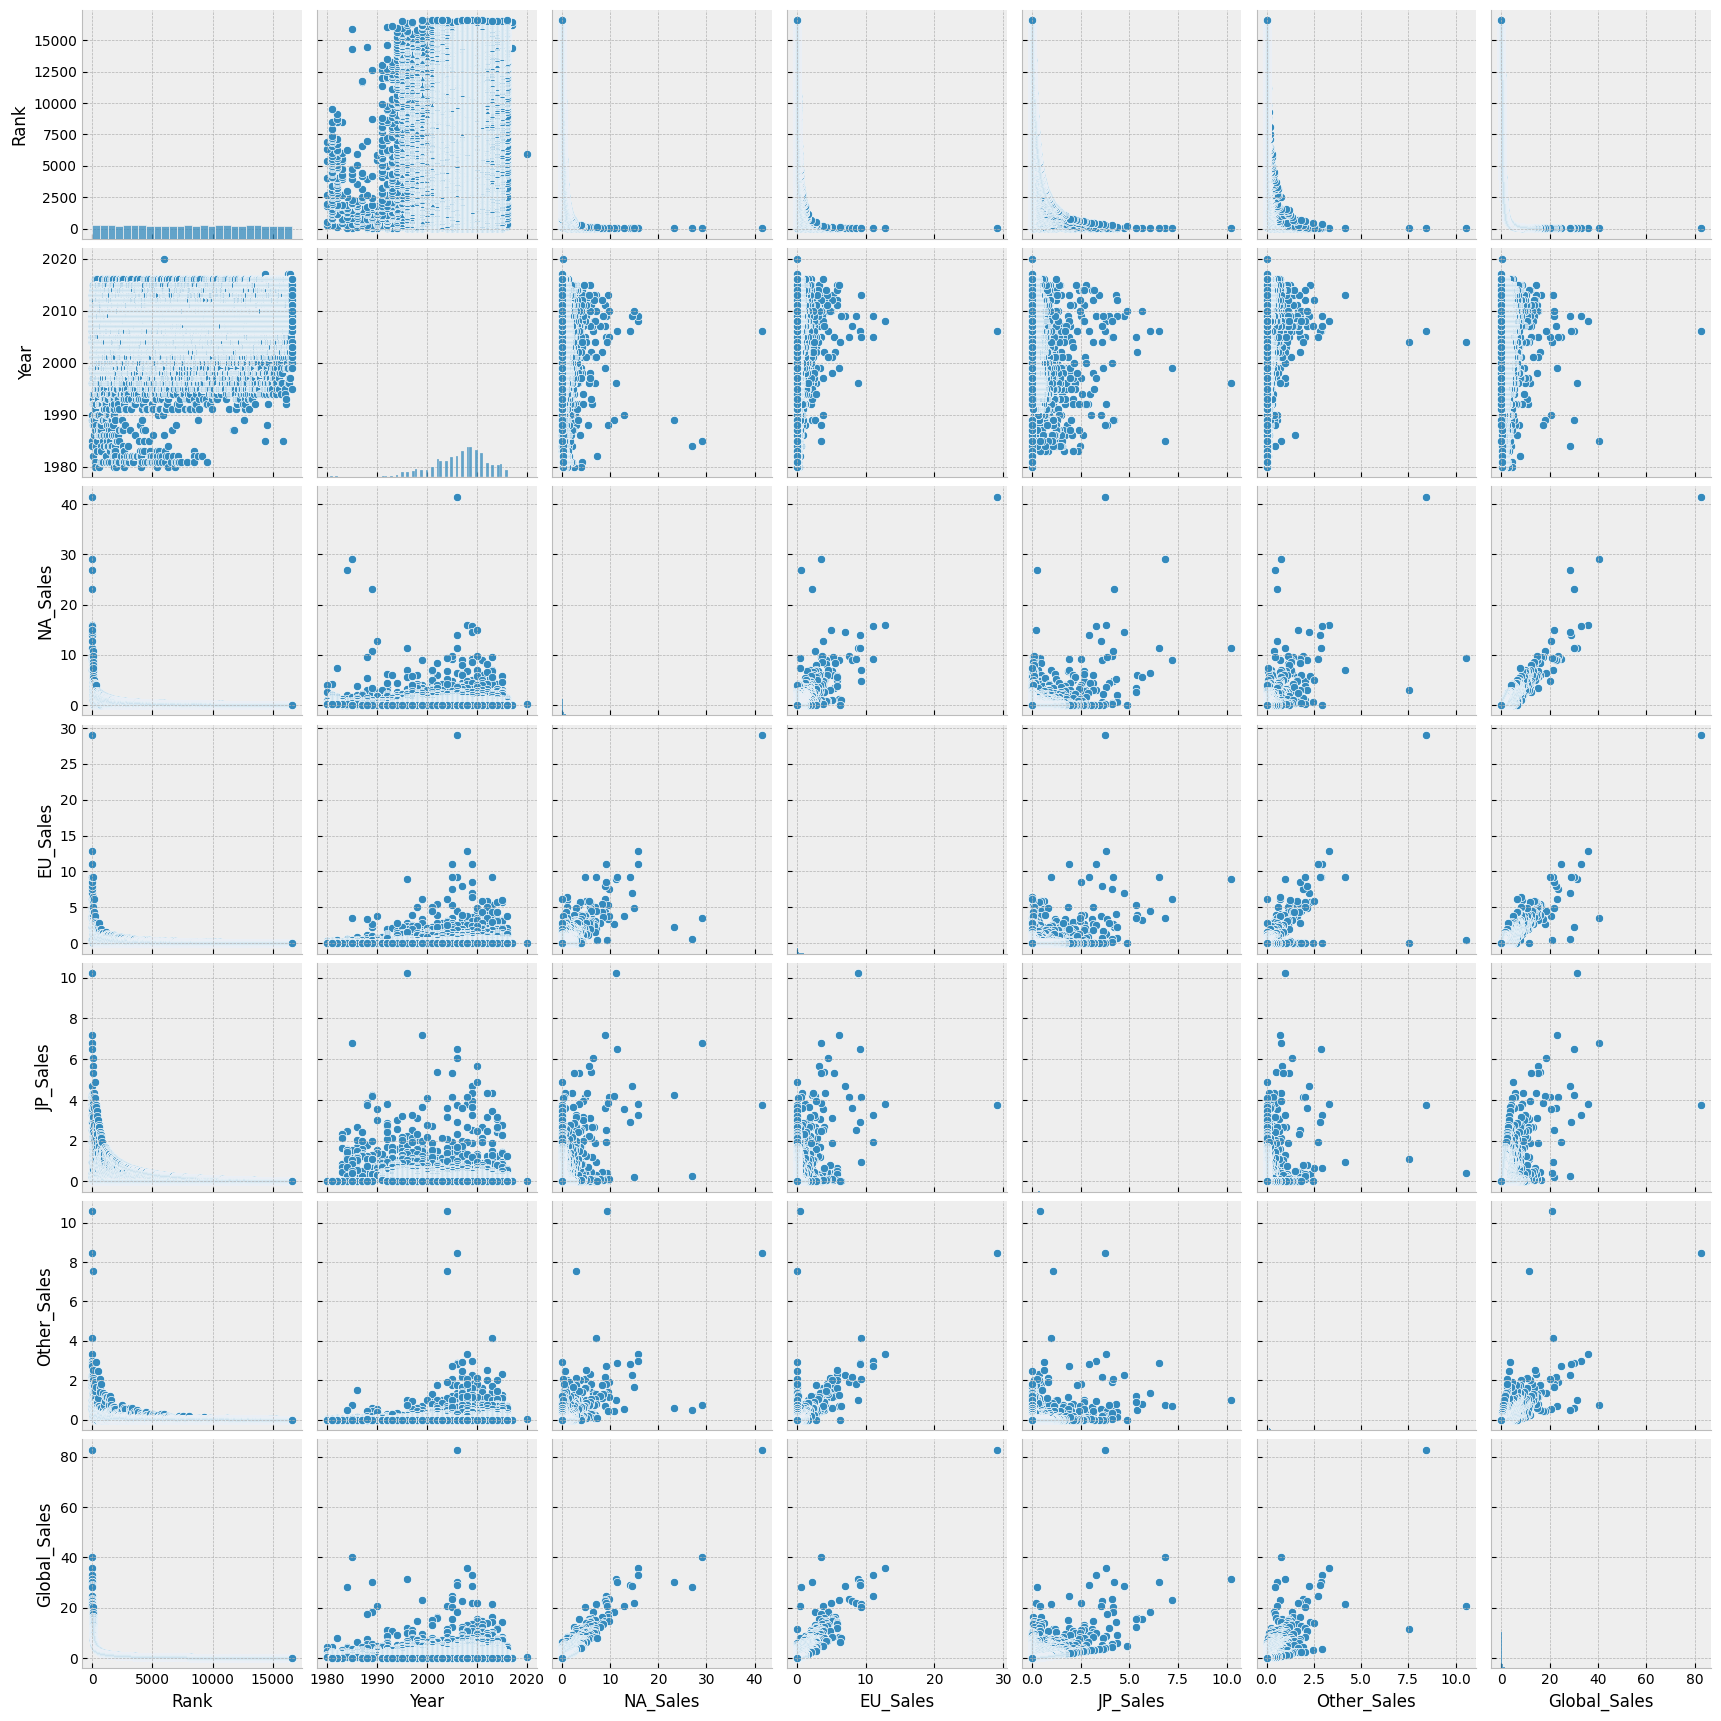

In [39]:
sns.pairplot(df)

In [40]:
# independent and Dependent features
X =df.iloc[:,:-1]
Y =df.iloc[:,-1]

In [41]:
X.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00


In [42]:
Y

0        82.74
1        40.24
2        35.82
3        33.00
4        31.37
         ...  
16593     0.01
16594     0.01
16595     0.01
16596     0.01
16597     0.01
Name: Global_Sales, Length: 16291, dtype: float64

In [54]:
#train Test Split
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

In [55]:
X_test

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
3527,3529,Petz Wild Animals: Tigerz,DS,2008.0,Simulation,Ubisoft,0.52,0.01,0.00,0.04
12216,12218,One Piece: Unlimited World Red,WiiU,2014.0,Action,Namco Bandai Games,0.00,0.04,0.02,0.00
7940,7942,3rd Super Robot Wars Z: Tengoku-Hen,PSV,2015.0,Action,Namco Bandai Games,0.00,0.00,0.19,0.00
3030,3032,RIFT,PC,2011.0,Role-Playing,Unknown,0.44,0.16,0.00,0.07
7144,7146,EX Monopoly,GBA,2001.0,Misc,Takara,0.16,0.06,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...
13781,13783,Katekyoo Hitman Reborn! Battle Arena 2 - Spiri...,PSP,2009.0,Fighting,Marvelous Interactive,0.00,0.00,0.04,0.00
15964,15967,Curse of the Amsterdam Diamond,DS,2012.0,Puzzle,Easy Interactive,0.00,0.01,0.00,0.00
11193,11195,50 Cent: Bulletproof,PSP,2006.0,Action,Vivendi Games,0.08,0.00,0.00,0.01
9400,9402,Over the Hedge: Hammy Goes Nuts!,DS,2006.0,Platform,Activision,0.12,0.00,0.00,0.01


In [56]:
X_train

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
1688,1690,WWE SmackDown vs Raw 2008,PSP,2007.0,Fighting,THQ,0.45,0.47,0.00,0.28
661,663,NBA 2K15,PS4,2014.0,Sports,Take-Two Interactive,1.46,0.54,0.01,0.37
3758,3760,Time Crisis II,PS2,2001.0,Shooter,Namco Bandai Games,0.26,0.20,0.00,0.07
12416,12418,MotoGP 10/11,X360,2011.0,Racing,Capcom,0.00,0.05,0.00,0.01
7350,7352,Robotech: The Macross Saga,GBA,2002.0,Shooter,TDK Mediactive,0.15,0.06,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...
13655,13657,Phantom Kingdom Portable,PSP,2011.0,Role-Playing,Nippon Ichi Software,0.00,0.00,0.04,0.00
5474,5476,Deus Ex: Invisible War,XB,2003.0,Shooter,Eidos Interactive,0.25,0.07,0.00,0.01
870,872,Tom Clancy's Rainbow Six: Vegas,X360,2006.0,Shooter,Ubisoft,1.09,0.65,0.02,0.20
16087,16090,Major Dream: Major Wii Nagero! Gyroball!!,Wii,2008.0,Sports,Takara Tomy,0.00,0.00,0.01,0.00


In [57]:
## Standardize the dataset
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [66]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
X_train['Name'] = label_encoder.fit_transform(X_train['Name'])

In [67]:
numerical_columns = X_train.select_dtypes(include=['float64', 'int64']).columns
X_train[numerical_columns] = scaler.fit_transform(X_train[numerical_columns])

In [72]:
import pickle
pickle.dump(scaler,open('scaling.pkl','wb'))

In [73]:
X_train

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
1688,-1.374033,1.525266,PSP,0.100967,Fighting,THQ,0.247422,0.737387,-0.255055,1.337582
661,-1.587697,0.156679,PS4,1.296527,Sports,Take-Two Interactive,1.581491,0.895571,-0.223138,1.855308
3758,-0.943377,1.339763,PS2,-0.923799,Shooter,Namco Bandai Games,-0.003541,0.127252,-0.255055,0.129555
12416,0.857889,0.097507,X360,0.784144,Racing,Capcom,-0.346965,-0.211712,-0.255055,-0.215596
7350,-0.196074,0.666360,GBA,-0.753005,Shooter,TDK Mediactive,-0.148836,-0.189115,-0.255055,-0.273121
...,...,...,...,...,...,...,...,...,...,...
13655,1.115659,0.433301,PSP,0.784144,Role-Playing,Nippon Ichi Software,-0.346965,-0.324700,-0.127387,-0.273121
5474,-0.586369,-1.120790,XB,-0.582210,Shooter,Eidos Interactive,-0.016750,-0.166517,-0.255055,-0.215596
870,-1.544215,1.369531,X360,-0.069828,Shooter,Ubisoft,1.092772,1.144144,-0.191221,0.877382
16087,1.621836,-0.099250,Wii,0.271761,Sports,Takara Tomy,-0.346965,-0.324700,-0.223138,-0.273121


In [74]:
X_test

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
3527,3529,Petz Wild Animals: Tigerz,DS,2008.0,Simulation,Ubisoft,0.52,0.01,0.00,0.04
12216,12218,One Piece: Unlimited World Red,WiiU,2014.0,Action,Namco Bandai Games,0.00,0.04,0.02,0.00
7940,7942,3rd Super Robot Wars Z: Tengoku-Hen,PSV,2015.0,Action,Namco Bandai Games,0.00,0.00,0.19,0.00
3030,3032,RIFT,PC,2011.0,Role-Playing,Unknown,0.44,0.16,0.00,0.07
7144,7146,EX Monopoly,GBA,2001.0,Misc,Takara,0.16,0.06,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...
13781,13783,Katekyoo Hitman Reborn! Battle Arena 2 - Spiri...,PSP,2009.0,Fighting,Marvelous Interactive,0.00,0.00,0.04,0.00
15964,15967,Curse of the Amsterdam Diamond,DS,2012.0,Puzzle,Easy Interactive,0.00,0.01,0.00,0.00
11193,11195,50 Cent: Bulletproof,PSP,2006.0,Action,Vivendi Games,0.08,0.00,0.00,0.01
9400,9402,Over the Hedge: Hammy Goes Nuts!,DS,2006.0,Platform,Activision,0.12,0.00,0.00,0.01


Model Training

In [75]:
from sklearn.linear_model import LinearRegression

In [76]:
regression=LinearRegression()

Pickling The Model file For Deployment

In [86]:
import pickle

In [87]:
pickle.dump(regression,open('regmodel.pkl','wb'))

In [90]:
pickled_model=pickle.load(open('regmodel.pkl','rb'))

In [91]:
print(y_train)
print(y_train.dtypes)  # Check data types in y_train


1688     1.19
661      2.38
3758     0.53
12416    0.06
7350     0.21
         ... 
13655    0.04
5474     0.33
870      1.96
16087    0.01
7400     0.21
Name: Global_Sales, Length: 13032, dtype: float64
float64


In [92]:
# Top Selling Games: What are the top 10 best-selling games of all time based on global sales?
top_10_games = df.sort_values(by='Global_Sales', ascending=False).head(10)
top_10_games

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
5,6,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26
6,7,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01
7,8,Wii Play,Wii,2006.0,Misc,Nintendo,14.03,9.20,2.93,2.85,29.02
8,9,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,14.59,7.06,4.70,2.26,28.62
9,10,Duck Hunt,NES,1984.0,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31


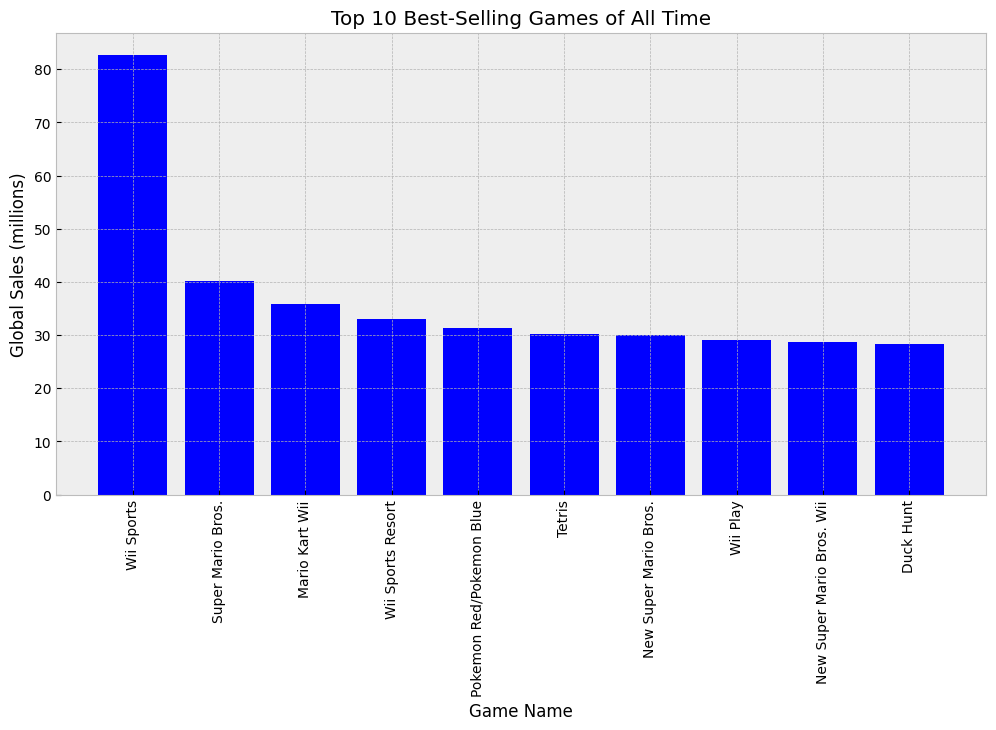

In [93]:
# Create a bar chart to visualize the global sales of top 10 games
plt.figure(figsize=(12, 6))
plt.bar(top_10_games['Name'], top_10_games['Global_Sales'], color='blue')
plt.xlabel('Game Name')
plt.ylabel('Global Sales (millions)')
plt.title('Top 10 Best-Selling Games of All Time')
plt.xticks(rotation=90)
plt.show()

In [94]:
platform_sales = df.groupby('Platform')['Global_Sales'].sum().reset_index()
platform_sales=platform_sales.sort_values(by='Global_Sales',ascending=False)

platform_sales

,Platform,Global_Sales
16,PS2,1233.46
28,X360,969.60
17,PS3,949.35
26,Wii,909.81
4,DS,818.91
15,PS,727.39
6,GBA,305.62
19,PSP,291.71
18,PS4,278.10
13,PC,254.70


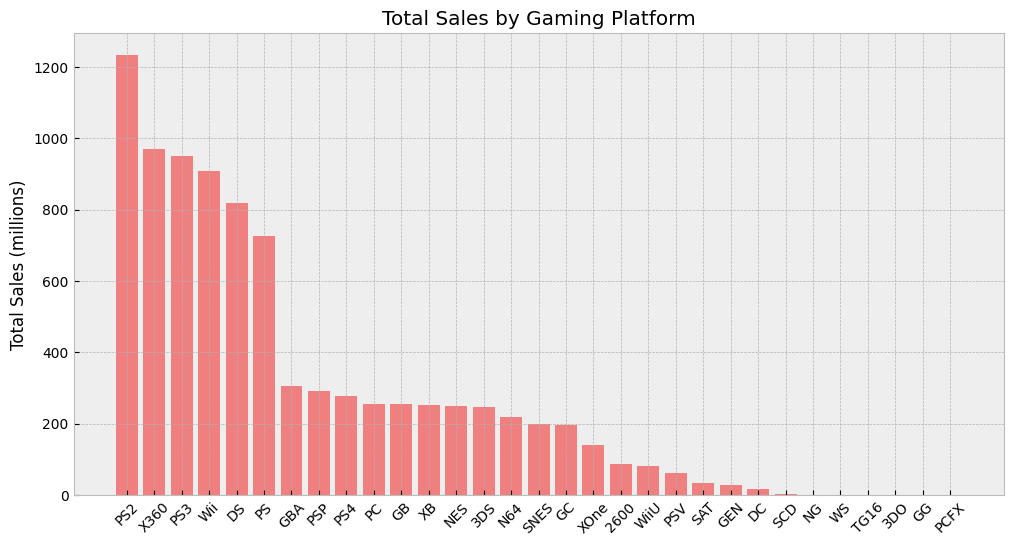

In [95]:
# Create a bar chart to visualize total sales by platform
plt.figure(figsize=(12, 6))
plt.bar(platform_sales['Platform'],platform_sales['Global_Sales'],color='lightcoral')
plt.ylabel('Total Sales (millions)')
plt.title('Total Sales by Gaming Platform')
plt.xticks(rotation=45)
plt.show()

In [96]:
Genre_Popularity=df.groupby('Genre')['Global_Sales'].sum().reset_index()
Genre_Popularity=Genre_Popularity.sort_values(by='Global_Sales',ascending=False)
Genre_Popularity

,Genre,Global_Sales
0,Action,1722.84
10,Sports,1309.24
8,Shooter,1026.20
7,Role-Playing,923.83
4,Platform,829.13
3,Misc,789.87
6,Racing,726.76
2,Fighting,444.05
9,Simulation,389.98
5,Puzzle,242.21


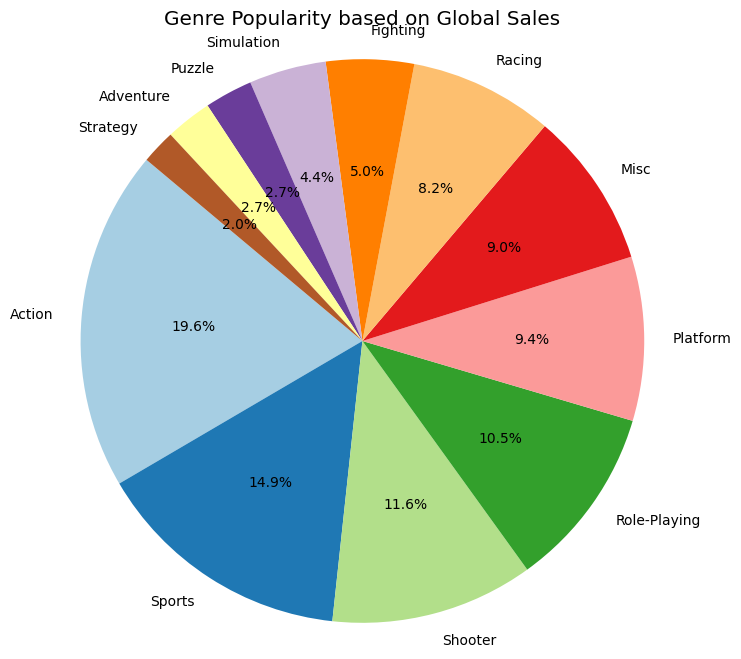

In [97]:
plt.figure(figsize=(8, 8))
plt.pie(Genre_Popularity['Global_Sales'], labels=Genre_Popularity['Genre'],autopct='%1.1f%%',
        startangle=140, colors=plt.cm.Paired.colors)
plt.axis('equal')
plt.title('Genre Popularity based on Global Sales')
plt.show()

In [98]:
region_sales=df[['NA_Sales','EU_Sales','JP_Sales','Other_Sales']].sum()
region_sales

NA_Sales       4327.65
EU_Sales       2406.69
JP_Sales       1284.27
Other_Sales     788.91
dtype: float64

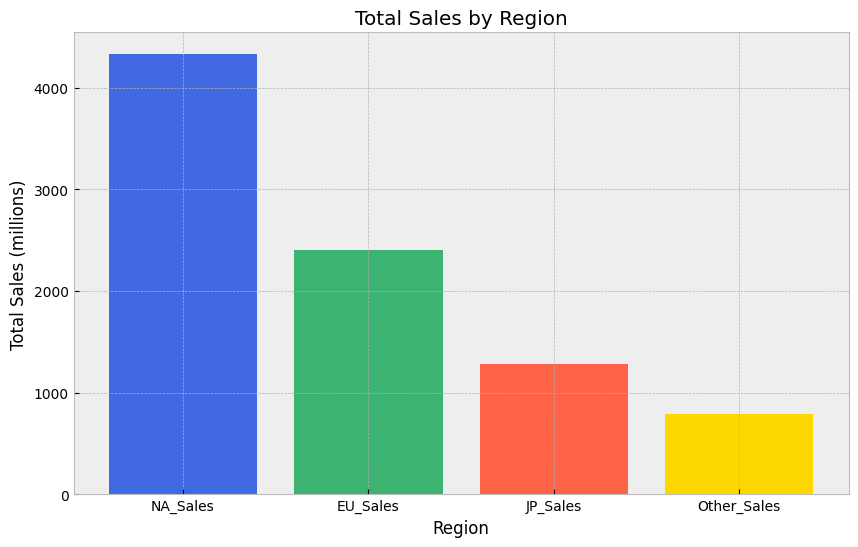

In [99]:
# Create a stacked bar chart to visualize sales by region
plt.figure(figsize=(10, 6))
plt.bar(region_sales.index, region_sales.values, color=['royalblue','mediumseagreen', 'tomato', 'gold'])
plt.xlabel('Region')
plt.ylabel('Total Sales (millions)')
plt.title('Total Sales by Region')
plt.show()

In [100]:
publisher_sales=df.groupby('Publisher')['Global_Sales'].sum().reset_index()
publisher_sales=publisher_sales.sort_values(by='Global_Sales',ascending=False).head(10)
publisher_sales

,Publisher,Global_Sales
359,Nintendo,1784.43
138,Electronic Arts,1093.39
21,Activision,721.41
455,Sony Computer Entertainment,607.28
524,Ubisoft,473.54
493,Take-Two Interactive,399.30
487,THQ,340.44
275,Konami Digital Entertainment,278.56
445,Sega,270.70
347,Namco Bandai Games,253.65


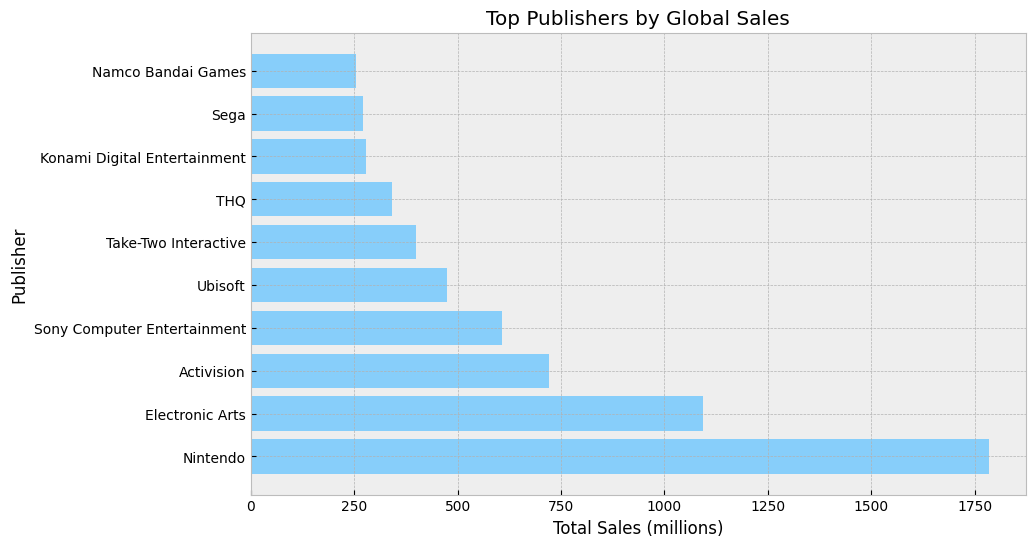

In [101]:
plt.figure(figsize=(10, 6))
plt.barh(publisher_sales['Publisher'], publisher_sales['Global_Sales'],color='lightskyblue')
plt.xlabel('Total Sales (millions)')
plt.ylabel('Publisher')
plt.title('Top Publishers by Global Sales')
plt.show()

In [102]:
yearly_sales = df.groupby('Year')['Global_Sales'].sum()
yearly_sales

Year
1980.0     11.38
1981.0     35.77
1982.0     28.86
1983.0     16.79
1984.0     50.36
1985.0     53.94
1986.0     37.07
1987.0     21.74
1988.0     47.22
1989.0     73.45
1990.0     49.39
1991.0     32.23
1992.0     76.16
1993.0     45.98
1994.0     79.17
1995.0     88.11
1996.0    199.15
1997.0    200.98
1998.0    256.47
1999.0    251.27
2000.0    201.56
2001.0    331.47
2002.0    395.52
2003.0    357.85
2004.0    414.01
2005.0    458.51
2006.0    521.04
2007.0    609.92
2008.0    678.90
2009.0    667.30
2010.0    600.29
2011.0    515.80
2012.0    363.49
2013.0    368.11
2014.0    337.03
2015.0    264.44
2016.0     70.90
2017.0      0.05
2020.0      0.29
Name: Global_Sales, dtype: float64

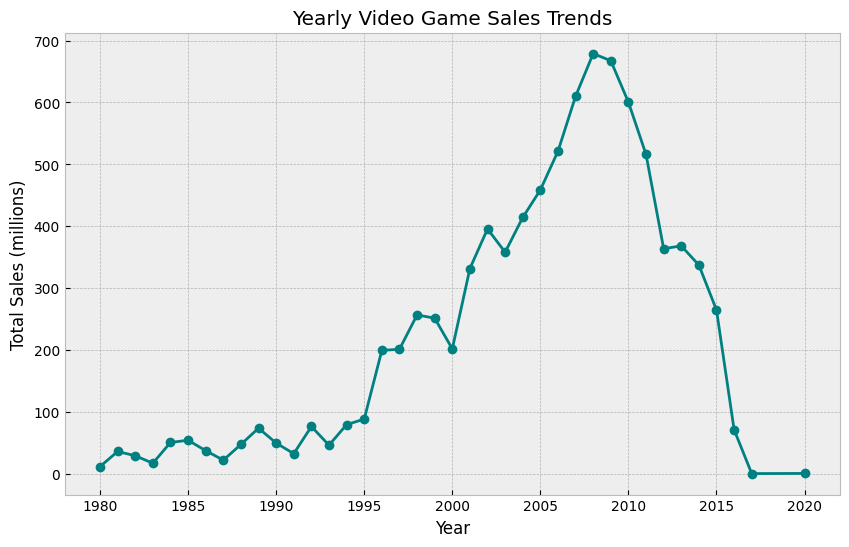

In [103]:
# Create a line chart to visualize the yearly sales trends
plt.figure(figsize=(10, 6))
plt.plot(yearly_sales.index, yearly_sales.values, marker='o', color='teal')
plt.xlabel('Year')
plt.ylabel('Total Sales (millions)')
plt.title('Yearly Video Game Sales Trends')
plt.grid(True)
plt.show()

In [104]:
platform_genre_sales=df.groupby(['Genre','Platform'])['Global_Sales'].sum().reset_index()

platform_genre_sales

,Genre,Platform,Global_Sales
0,Action,2600,26.39
1,Action,3DS,56.61
2,Action,DC,1.26
3,Action,DS,114.16
4,Action,GB,7.92
...,...,...,...
288,Strategy,Wii,5.23
289,Strategy,WiiU,1.24
290,Strategy,X360,9.77
291,Strategy,XB,2.78


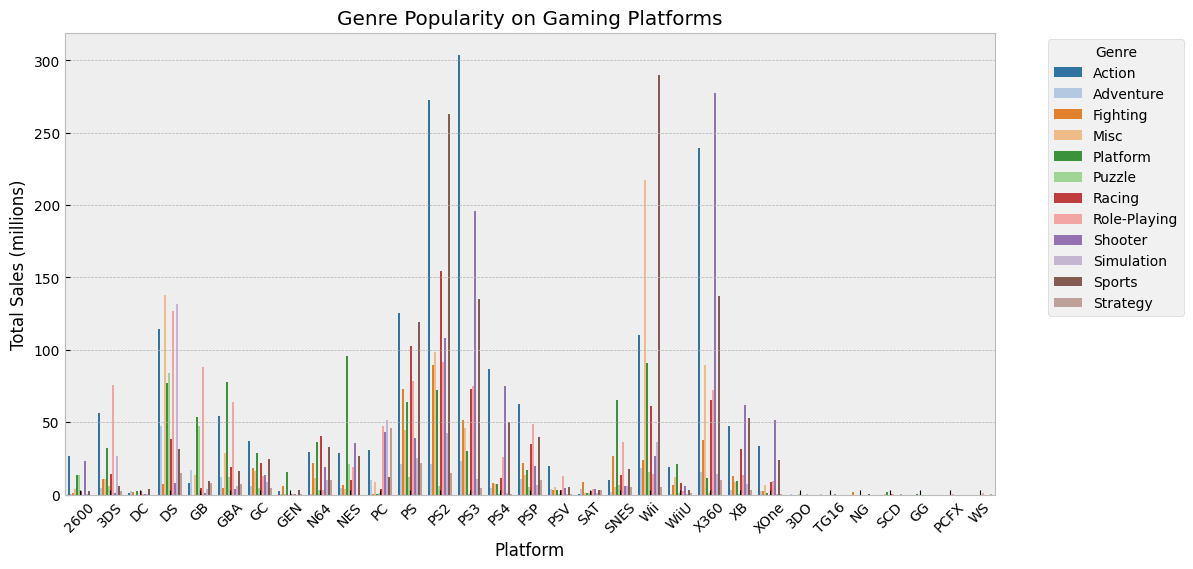

In [105]:
plt.figure(figsize=(12, 6))
sns.barplot(x='Platform', y='Global_Sales', hue='Genre',data=platform_genre_sales, palette='tab20')
plt.xlabel('Platform')
plt.ylabel('Total Sales (millions)')
plt.title('Genre Popularity on Gaming Platforms')
plt.legend(title='Genre', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.show()

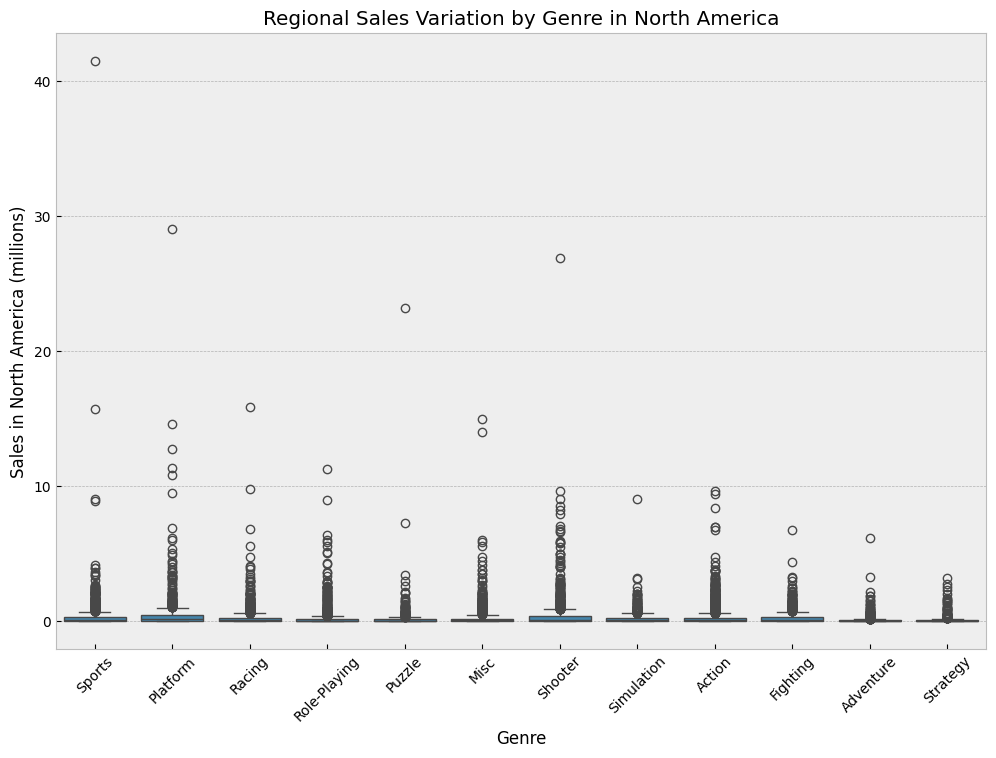

In [106]:
# Create box plots to visualize sales variation of genres and platforms in North America␣
plt.figure(figsize=(12, 8))
sns.boxplot(x='Genre', y='NA_Sales', data=df)
plt.xlabel('Genre')
plt.ylabel('Sales in North America (millions)')
plt.title('Regional Sales Variation by Genre in North America')
plt.xticks(rotation=45)
plt.show()

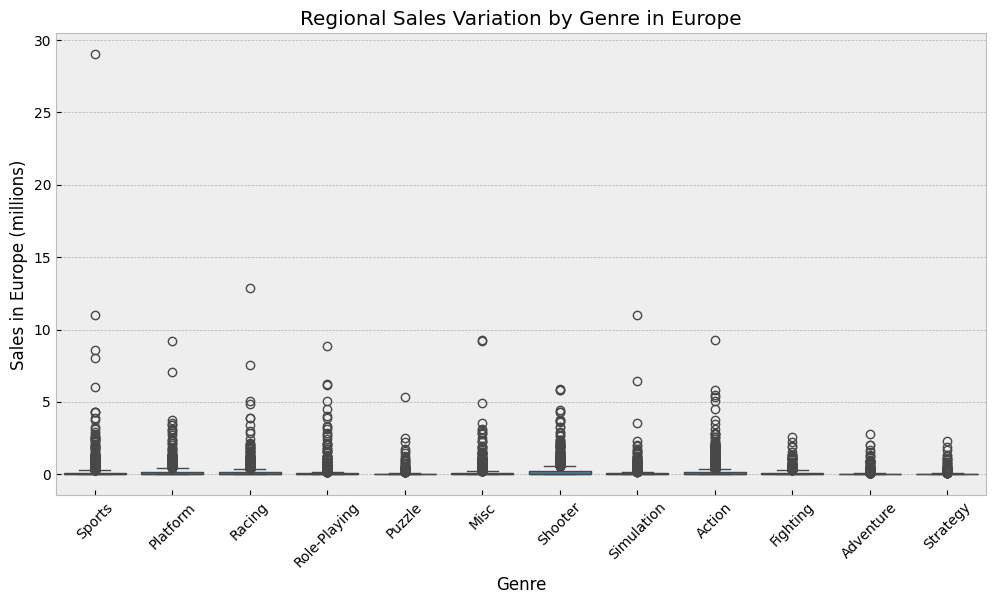

In [107]:
# Create box plots to visualize sales variation of genres and platforms in Europe
plt.figure(figsize=(12,6))
sns.boxplot(df,x='Genre', y='EU_Sales')
plt.xlabel('Genre')
plt.ylabel('Sales in Europe (millions)')
plt.title('Regional Sales Variation by Genre in Europe')
plt.xticks(rotation=45)
plt.show()

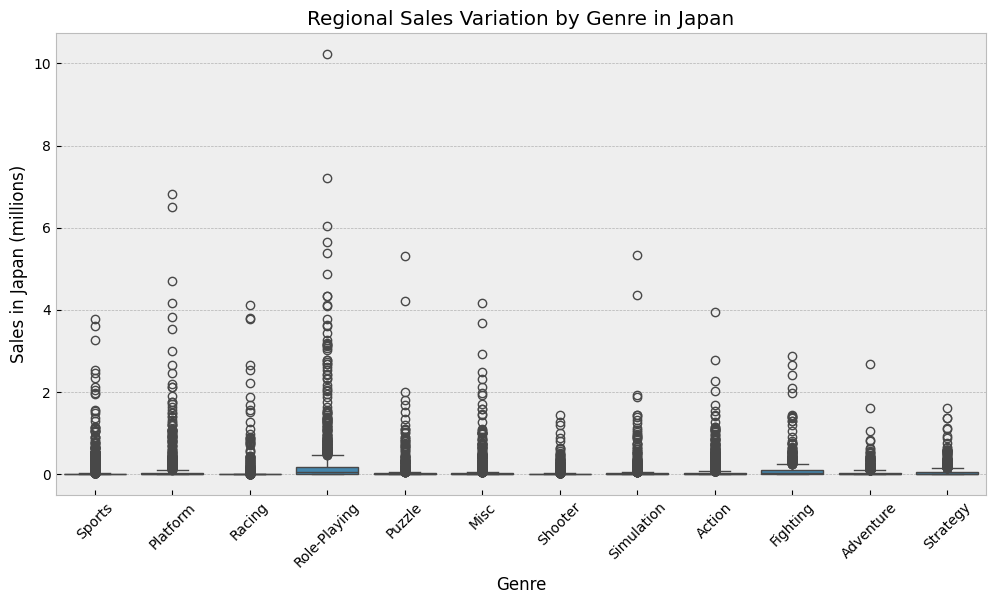

In [108]:
# Create box plots to visualize sales variation of genres and platforms in japan
plt.figure(figsize=(12,6))
sns.boxplot(df,x='Genre', y='JP_Sales')
plt.xlabel('Genre')
plt.ylabel('Sales in Japan (millions)')
plt.title('Regional Sales Variation by Genre in Japan')
plt.xticks(rotation=45)
plt.show()

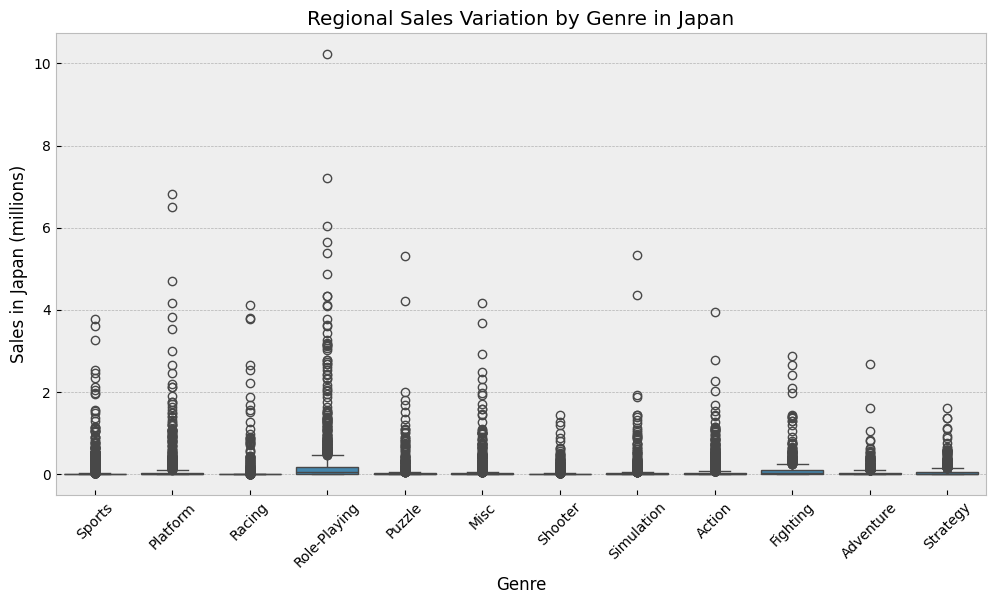

In [109]:
# Create box plots to visualize sales variation of genres and platforms in Other Counteries
plt.figure(figsize=(12,6))
sns.boxplot(df,x='Genre', y='JP_Sales')
plt.xlabel('Genre')
plt.ylabel('Sales in Japan (millions)')
plt.title('Regional Sales Variation by Genre in Japan')
plt.xticks(rotation=45)
plt.show()

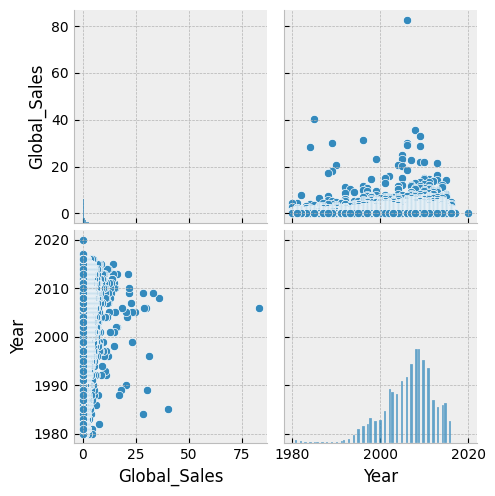

In [110]:
sns.pairplot(df[['Global_Sales', 'Year', 'Publisher']])
plt.show()

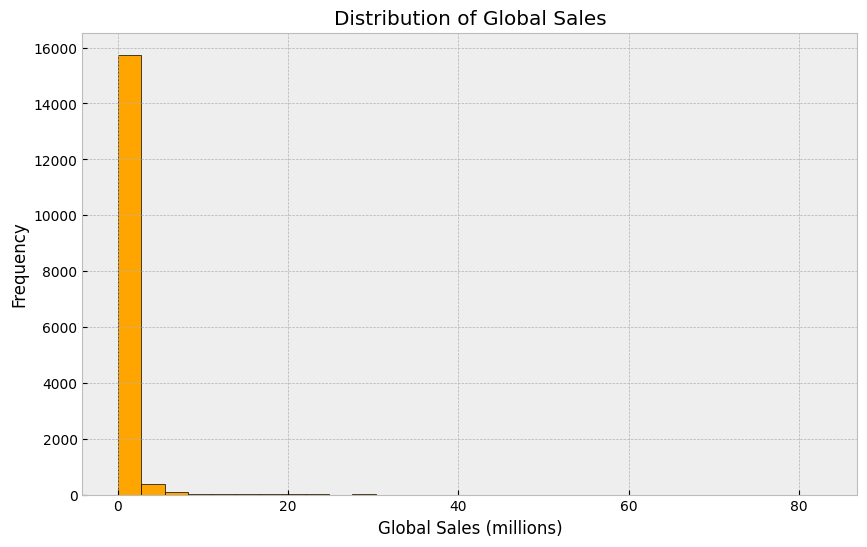

In [111]:
plt.figure(figsize=(10, 6))
plt.hist(df['Global_Sales'], bins=30, color='orange', edgecolor='black')
plt.xlabel('Global Sales (millions)')
plt.ylabel('Frequency')
plt.title('Distribution of Global Sales')
plt.show()

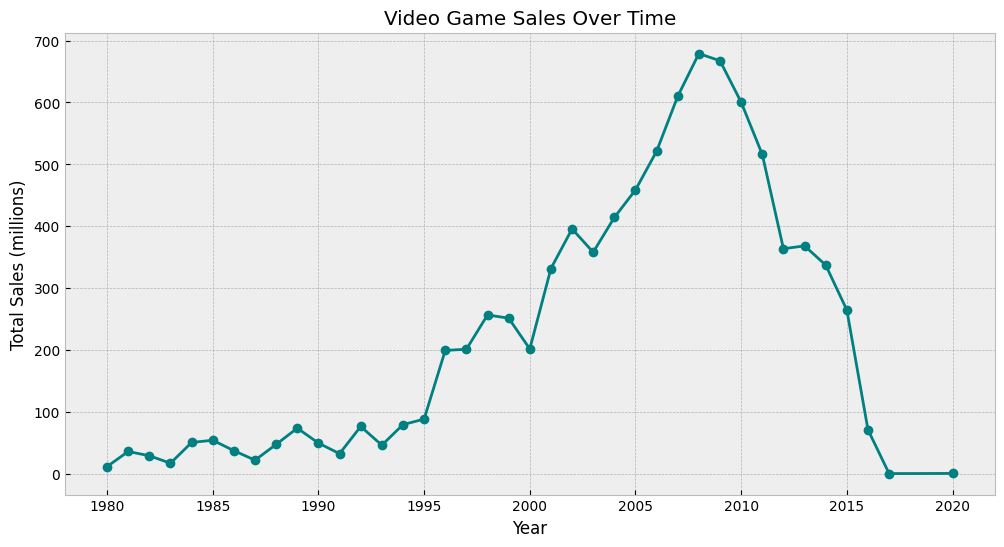

In [112]:
yearly_sales=df.groupby('Year')['Global_Sales'].sum()
plt.figure(figsize=(12,6))
plt.plot(yearly_sales.index,yearly_sales.values,marker="o",color="teal")
plt.xlabel('Year')
plt.ylabel('Total Sales (millions)')
plt.title('Video Game Sales Over Time')
plt.grid(True)
plt.show()

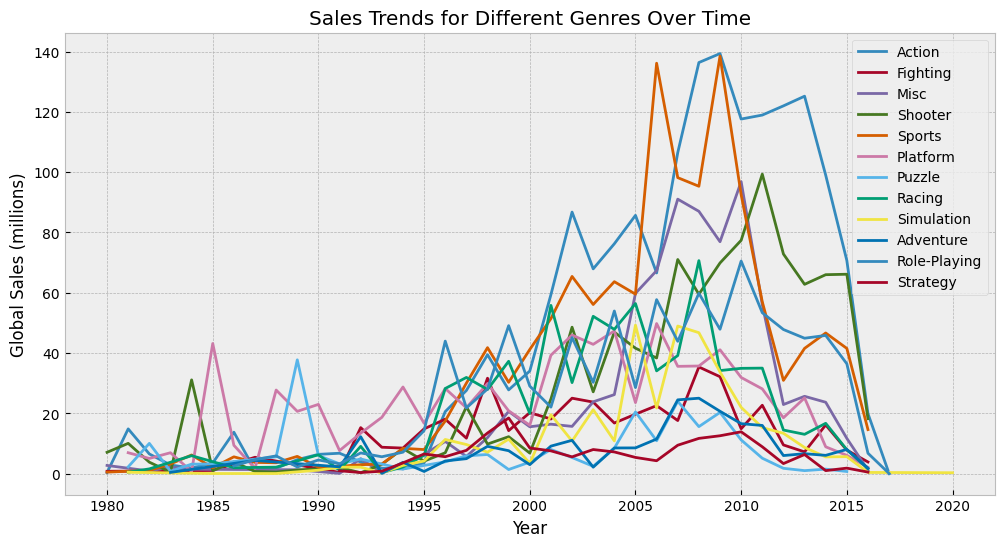

In [113]:
# Group data by year and genre and calculate total sales
yearly_genre_sales = df.groupby(['Year', 'Genre'])['Global_Sales'].sum().reset_index()

# Create a line plot to visualize sales trends for each genre
plt.figure(figsize=(12, 6))
for genre in yearly_genre_sales['Genre'].unique():
  genre_sales = yearly_genre_sales[yearly_genre_sales['Genre'] == genre]
  plt.plot(genre_sales['Year'], genre_sales['Global_Sales'], label=genre)

plt.xlabel('Year')
plt.ylabel('Global Sales (millions)')
plt.title('Sales Trends for Different Genres Over Time')
plt.legend()
plt.show()

In [114]:
df.head(1)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74


In [115]:
genre_sales_by_region=df.groupby('Genre')[['NA_Sales','EU_Sales','JP_Sales']].sum().reset_index()
genre_sales_by_region

,Genre,NA_Sales,EU_Sales,JP_Sales
0,Action,861.77,516.48,158.65
1,Adventure,101.93,63.74,51.99
2,Fighting,220.74,100.00,87.15
3,Misc,396.92,211.77,106.67
4,Platform,445.99,200.65,130.65
5,Puzzle,122.01,50.52,56.68
6,Racing,356.93,236.31,56.61
7,Role-Playing,326.50,187.57,350.29
8,Shooter,575.16,310.45,38.18
9,Simulation,181.78,113.02,63.54


In [116]:
top_na_genre =genre_sales_by_region[['Genre','NA_Sales']].sort_values(by='NA_Sales', ascending=False).head(1)
top_eu_genre =genre_sales_by_region[['Genre','EU_Sales']].sort_values(by='EU_Sales', ascending=False).head(1)
top_jp_genre=genre_sales_by_region[['Genre','JP_Sales']].sort_values(by='JP_Sales',ascending=False).head(1)

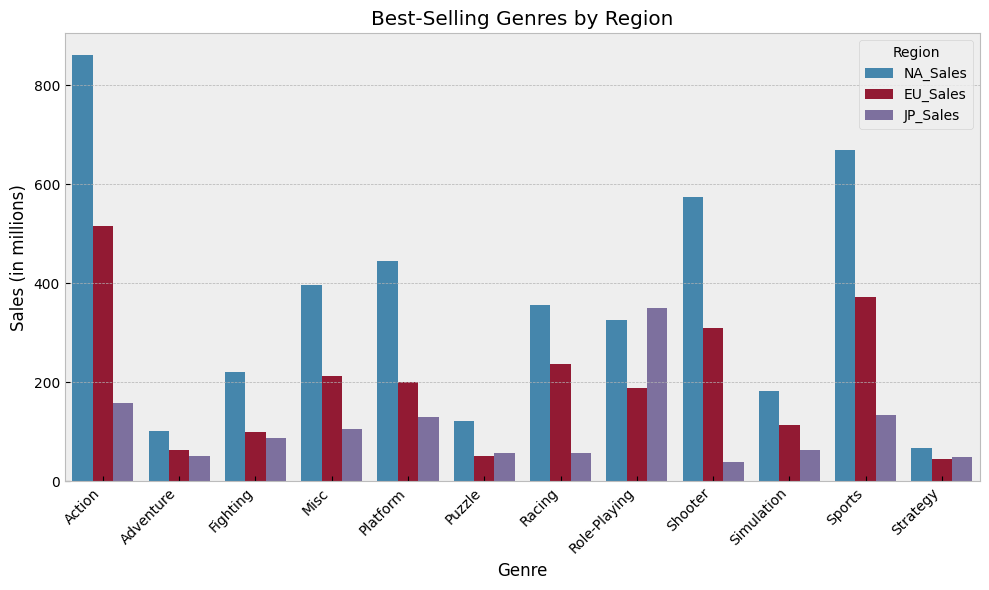

In [117]:
melted_df=genre_sales_by_region.melt(id_vars="Genre",var_name='Region',value_name='sales')
plt.figure(figsize=(10,6))
sns.barplot(x='Genre',y='sales',hue='Region',data=melted_df)
plt.ylabel('Sales (in millions)')
plt.title('Best-Selling Genres by Region')
plt.xticks(rotation=45, ha='right')  
plt.legend(title='Region')
plt.tight_layout()
plt.show()

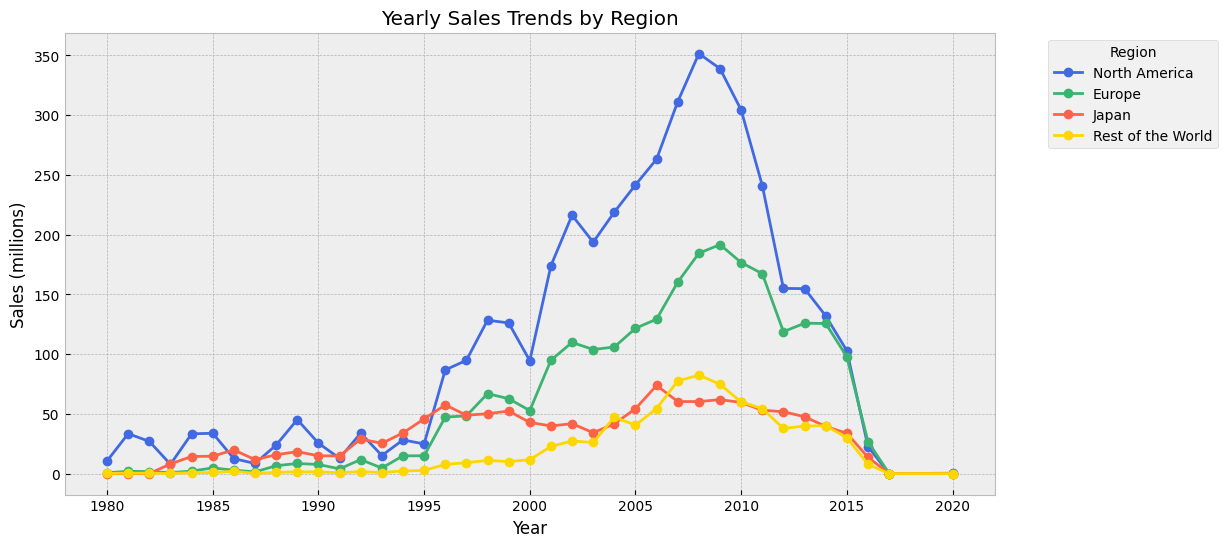

In [118]:
yearly_sales_by_region = df.groupby('Year')[['NA_Sales', 'EU_Sales','JP_Sales', 'Other_Sales']].sum()
# Create line plots to visualize yearly sales trends in each region
plt.figure(figsize=(12, 6))
plt.plot(yearly_sales_by_region.index, yearly_sales_by_region['NA_Sales'],label='North America', marker='o', color='royalblue')
plt.plot(yearly_sales_by_region.index, yearly_sales_by_region['EU_Sales'],label='Europe', marker='o', color='mediumseagreen')
plt.plot(yearly_sales_by_region.index, yearly_sales_by_region['JP_Sales'],label='Japan', marker='o', color='tomato')
plt.plot(yearly_sales_by_region.index, yearly_sales_by_region['Other_Sales'],label='Rest of the World', marker='o', color='gold')
plt.xlabel('Year')
plt.ylabel('Sales (millions)')
plt.title('Yearly Sales Trends by Region')
plt.legend(title='Region', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

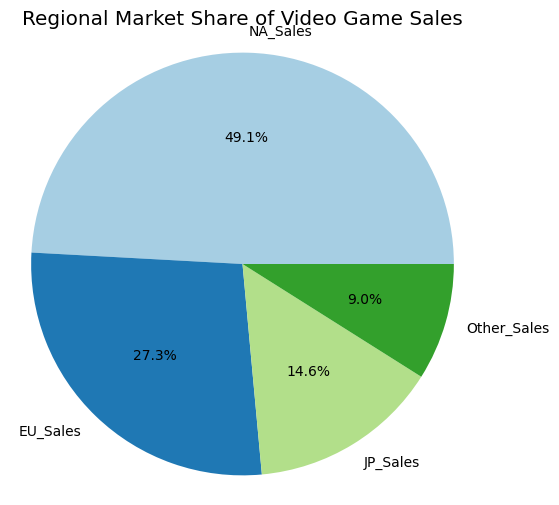

In [119]:
total_global_sales=df['Global_Sales'].sum()
region_market_share=df[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].sum()/total_global_sales*100
plt.figure(figsize=(6,6))
plt.pie(region_market_share,labels=region_market_share.index, autopct='%1.1f%%', colors=plt.cm.Paired.colors)
plt.axis('equal')
plt.title('Regional Market Share of Video Game Sales')
plt.show()

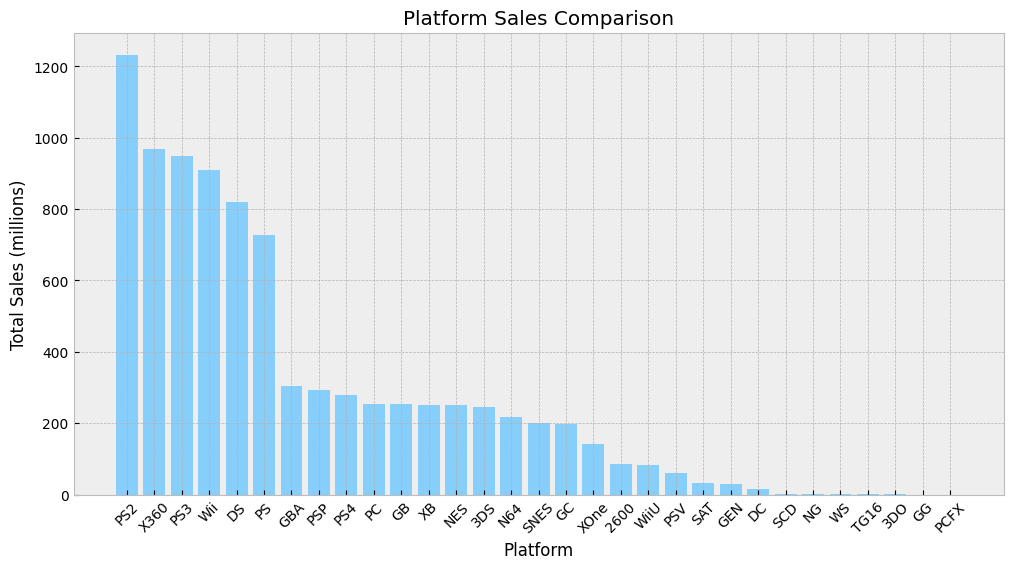

In [120]:
platform_sales=df.groupby('Platform')['Global_Sales'].sum().reset_index()
platform_sales=platform_sales.sort_values(by='Global_Sales', ascending=False)
plt.figure(figsize=(12, 6))
plt.bar(platform_sales['Platform'], platform_sales['Global_Sales'],color='lightskyblue')
plt.xlabel('Platform')
plt.ylabel('Total Sales (millions)')
plt.title('Platform Sales Comparison')
plt.xticks(rotation=45)
plt.show()